In [ ]:

# Let's say we want to open a new, very awesome, restaurant. Where should we set up our new restaurant so we can
# virtually ensure specacular success? The success of any restaurant depends on a combination of factors, and a 
# comprehensive approach that considers multiple aspects will contribute to informed decision-making.

# Finding the best locations to open new restaurants in densely populated metropolitan areas involves a combination 
# of factors, including foot traffic, demographic information, competition analysis, and local regulations.

# We can analyze the following items: Foot Traffic, Demographic Analysis, Competitive Analysis, Accessibility, 
# Local Regulations, Collaborate with Local Businesses, Social Media and Reviews, Community Engagement, Predictive 
# Modeling, Consult Experts, Pilot Programs, and some other metrics.


   LocationID   Latitude   Longitude  FootTrafficScore  AverageIncome  \
0           1  37.649816 -122.814867                77          67508   
1           2  37.880286 -122.458099                56          72005   
2           3  37.792798 -122.127054                84          65206   
3           4  37.739463 -122.267775                77          68971   
4           5  37.562407 -122.193439                63          75599   

   CompetitionCount  RegulationScore  
0                 9                4  
1                 8                1  
2                 4                7  
3                 4                6  
4                 9                9  
First few rows of the DataFrame:
   LocationID   Latitude   Longitude  FootTrafficScore  AverageIncome  \
0           1  37.649816 -122.814867                77          67508   
1           2  37.880286 -122.458099                56          72005   
2           3  37.792798 -122.127054                84          65206   
3 

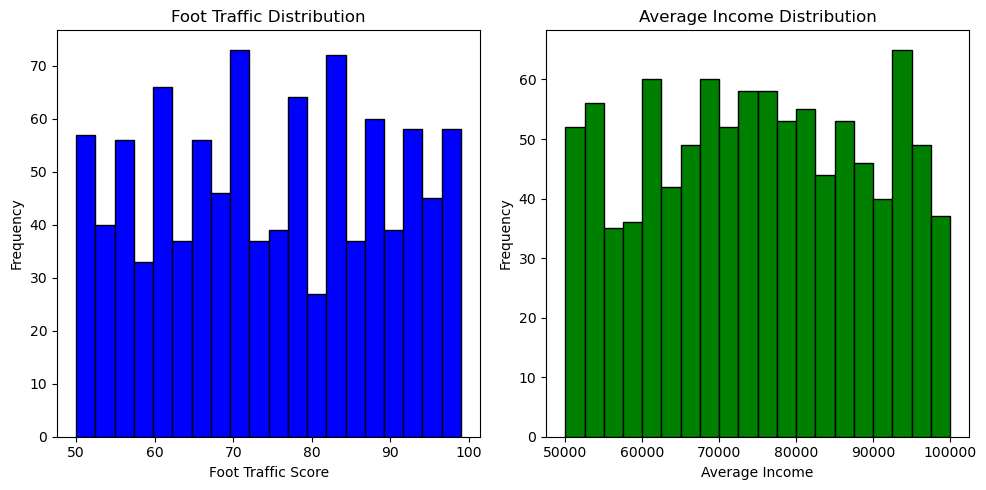


Updated DataFrame with Demographic, Competition, and Regulation Analysis:
   LocationID   Latitude   Longitude  FootTrafficScore  AverageIncome  \
0           1  37.649816 -122.814867                77          67508   
1           2  37.880286 -122.458099                56          72005   
2           3  37.792798 -122.127054                84          65206   
3           4  37.739463 -122.267775                77          68971   
4           5  37.562407 -122.193439                63          75599   

   CompetitionCount  RegulationScore  DemographicScore  CompetitionIntensity  \
0                 9                4                 8              0.116883   
1                 8                1                 2              0.142857   
2                 4                7                 5              0.047619   
3                 4                6                 9              0.051948   
4                 9                9                 8              0.142857   

   Re

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate synthetic data for demonstration (replace with actual data)
np.random.seed(42)
locations_data = {
    'LocationID': range(1, 1001),
    'Latitude': np.random.uniform(37.5, 37.9, 1000),
    'Longitude': np.random.uniform(-123, -122, 1000),
    'FootTrafficScore': np.random.randint(50, 100, 1000),
    'AverageIncome': np.random.randint(50000, 100000, 1000),
    'CompetitionCount': np.random.randint(1, 10, 1000),
    'RegulationScore': np.random.randint(1, 10, 1000)
}

# Create a DataFrame with 1000 records
df_large = pd.DataFrame(locations_data)
print(df_large.head())


# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:")
print(df_large.head())

# Basic analysis
def basic_analysis(dataframe):
    print("\nBasic Analysis:")
    
    # Descriptive statistics
    print(dataframe.describe())
    
    # Correlation matrix
    correlation_matrix = dataframe.corr()
    print("\nCorrelation Matrix:")
    print(correlation_matrix)
    
    # Foot traffic distribution
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.hist(dataframe['FootTrafficScore'], bins=20, color='blue', edgecolor='black')
    plt.title('Foot Traffic Distribution')
    plt.xlabel('Foot Traffic Score')
    plt.ylabel('Frequency')
    
    # Income distribution
    plt.subplot(1, 2, 2)
    plt.hist(dataframe['AverageIncome'], bins=20, color='green', edgecolor='black')
    plt.title('Average Income Distribution')
    plt.xlabel('Average Income')
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

basic_analysis(df_large)

# Demographic analysis (for demonstration purposes, using a simple demographic model)
df_large['DemographicScore'] = np.random.randint(1, 10, size=len(df_large))

# Competition analysis
df_large['CompetitionIntensity'] = df_large['CompetitionCount'] / df_large['FootTrafficScore']

# Local regulations analysis (for demonstration purposes, using a simple model)
df_large['RegulationImpact'] = df_large['RegulationScore'] * 0.1

# Display the updated DataFrame
print("\nUpdated DataFrame with Demographic, Competition, and Regulation Analysis:")
print(df_large.head())


In [3]:

# To plot the results of latitude and longitude coordinates on a Folium map, you can use the folium library in 
# Python. Below is a code smaple that should help us make a well-defined decision about where to open our restaurant! 

import folium
from folium.plugins import MarkerCluster

import folium
import geopandas as gpd
from shapely.geometry import Point


# Load the land polygons shapefile
land_polygons = gpd.read_file('C:\\Users\\ne_10m_admin_0_countries.shp')

# Select the top 10 locations
top_10_locations = df_large.nlargest(10, 'FootTrafficScore')

# Filter the DataFrame to include only locations within land polygons
top_10_locations = top_10_locations[top_10_locations.apply(lambda row: Point(row['Longitude'], row['Latitude']).within(land_polygons.unary_union), axis=1)]


# Create a Folium map centered at the average location of all locations
average_location = [top_10_locations['Latitude'].mean(), top_10_locations['Longitude'].mean()]
my_map = folium.Map(location=average_location, zoom_start=14)

# Use MarkerCluster for better handling of multiple markers
marker_cluster = MarkerCluster().add_to(my_map)

# Counter for the number of locations added to the map
locations_added = 0

# Iterate through rows in df_sorted
for index, row in df_large.iterrows():
    # Skip if the location is not within land polygons
    if not Point(row['Longitude'], row['Latitude']).within(land_polygons.unary_union):
        continue
    
    # Customize the marker based on your criteria
    color = 'red' if row['FootTrafficScore'] > 80 else 'blue'
    
    # Add a marker for each location
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Location {row['LocationID']} - Foot Traffic: {row['FootTrafficScore']}",
        icon=folium.Icon(color=color)
    ).add_to(marker_cluster)
    
    # Increment the counter
    locations_added += 1
    
    # Break the loop if we have added 10 locations
    if locations_added == 10:
        break

# Save the map as an HTML file
my_map


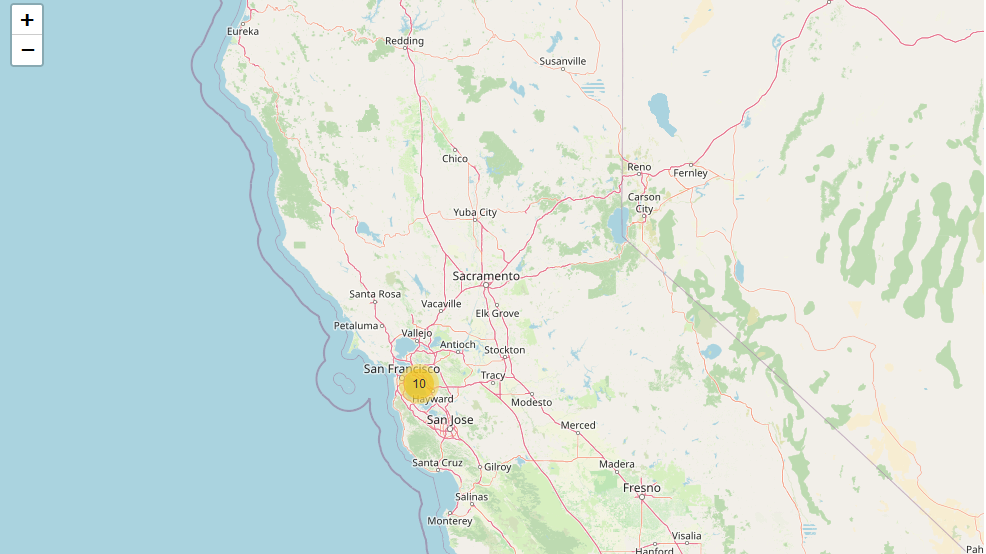

In [4]:

from IPython.display import Image
from IPython.core.display import HTML 
PATH = "C:\\Users\\"
Image(filename = PATH + "1.JPG")


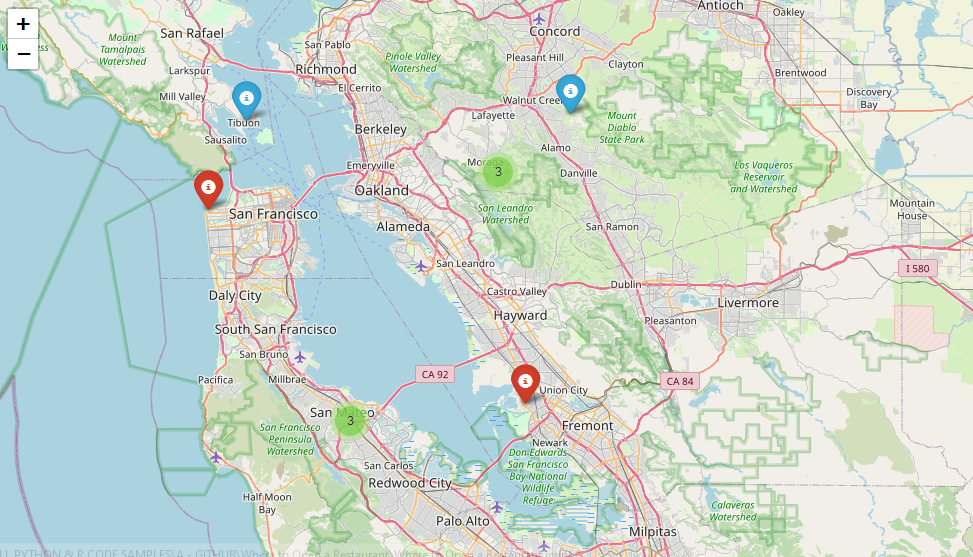

In [5]:

from IPython.display import Image
from IPython.core.display import HTML 
PATH = "C:\\Users\\"
Image(filename = PATH + "2.JPG")


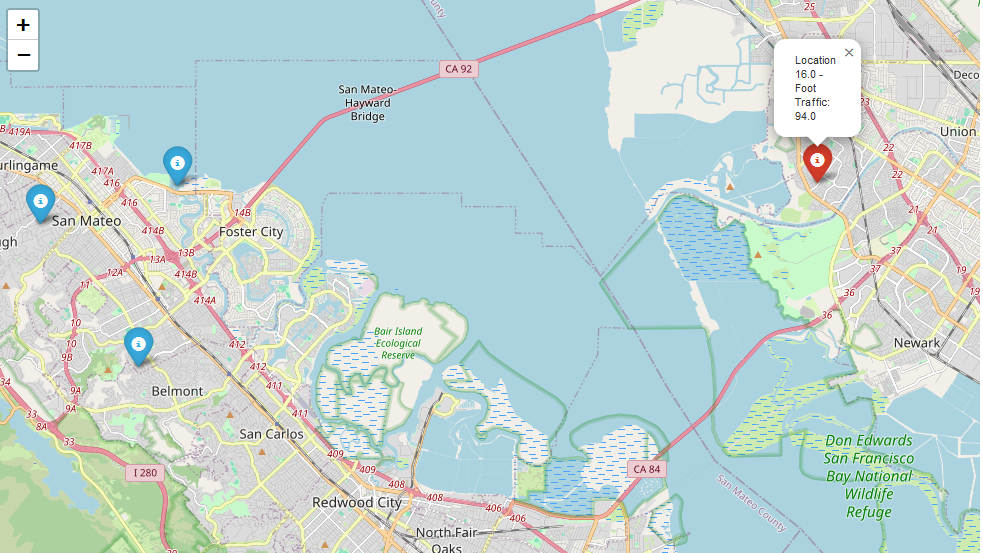

In [6]:

from IPython.display import Image
from IPython.core.display import HTML 
PATH = "C:\\Users\\"
Image(filename = PATH + "3.JPG")


In [ ]:

# Each location is represented by a marker on the map.

# The color of the marker is determined based on the Foot Traffic Score. You can customize this logic according to 
# your own criteria.

# The popup for each marker provides information about the location, such as the Location ID and Foot Traffic Score.

# In the example above, the latitude and longitude coordinates were generated randomly. Some appeared on the water, 
# and not on land. Obviously, we are opening our restaurant on terra firma, and not on top of the water. For this 
# reason, I am iterating through rows in df_sorted, until I get 10 on land, and then I'm stopping the loop. In a 
# real-world example, you will almost certianly have lat and lon coordinates for land, not land and water, so you
# should be able to just use what you have, and theu, there should be no need to loop over records in the dataframe.


In [ ]:

# Data Sources:
# https://github.com/nvkelso/natural-earth-vector/blob/master/10m_cultural/ne_10m_admin_0_countries.shx
# ne_10m_admin_0_countries.shp
# ne_10m_admin_0_countries.shx
# You need to download both these files and place both in the same folder...but reference only the file
# named 'ne_10m_admin_0_countries.shp'!!
